In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.cluster import KMeans

In [59]:
from sklearn.metrics import silhouette_score

In [100]:
from mpl_toolkits.mplot3d import Axes3D

In [56]:
import warnings

In [57]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
new_columns = {'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}
df = df.rename(columns=new_columns)

In [6]:
df.head(3)

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [8]:
df.head(3)

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

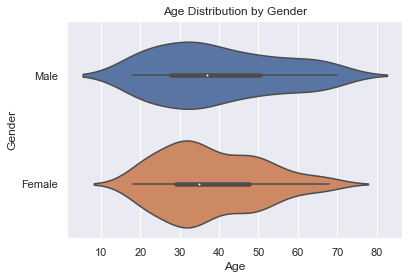

In [16]:
sns.set(style='darkgrid', context='notebook')

sns.violinplot(y='Gender', x='Age', data=df, orient='h')

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Gender')

plt.show()

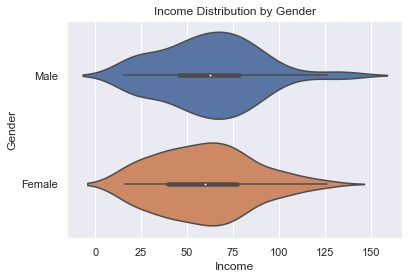

In [21]:
sns.set(style='darkgrid', context='notebook')

sns.violinplot(y='Gender', x='Income', data=df, orient='h')

plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Gender')

plt.show()

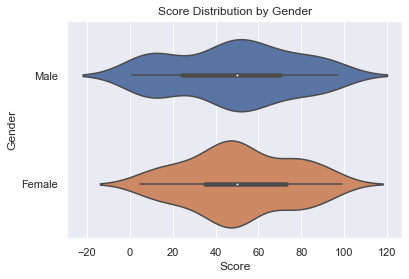

In [28]:
sns.set(style='darkgrid', context='notebook')

sns.violinplot(y='Gender', x='Score', data=df, orient='h')

plt.title('Score Distribution by Gender')
plt.xlabel('Score')
plt.ylabel('Gender')

plt.show()

In [23]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

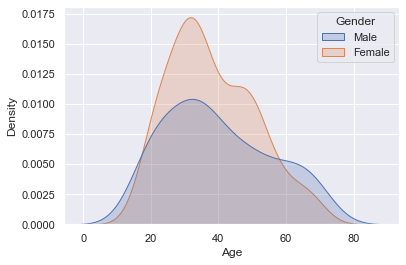

In [36]:
sns.kdeplot(data=df, x='Age', hue='Gender', fill=True)

<AxesSubplot:xlabel='Income', ylabel='Density'>

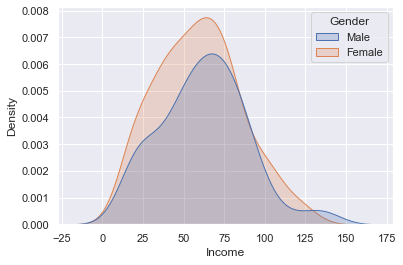

In [37]:
sns.kdeplot(data=df, x='Income', hue='Gender', fill=True)

<AxesSubplot:xlabel='Score', ylabel='Density'>

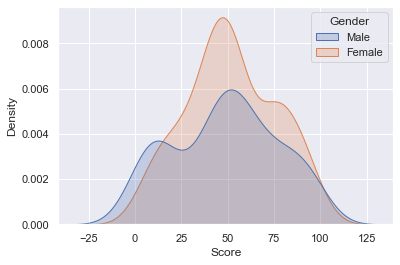

In [38]:
sns.kdeplot(data=df, x='Score', hue='Gender', fill=True)

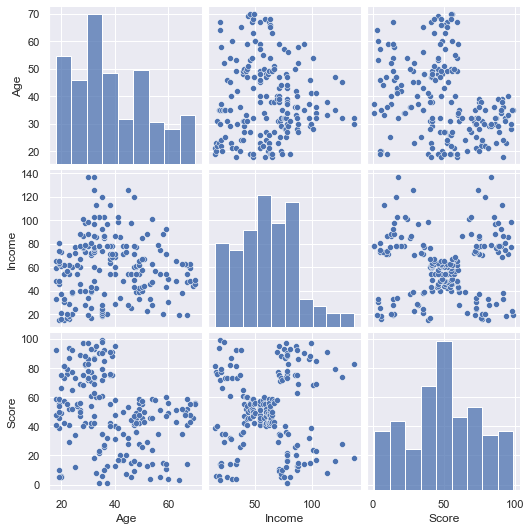

In [39]:
sns.pairplot(df)

In [40]:
# There are cluster patterns that can be observed in the graph of Score and Income and Score and Age.

<AxesSubplot:>

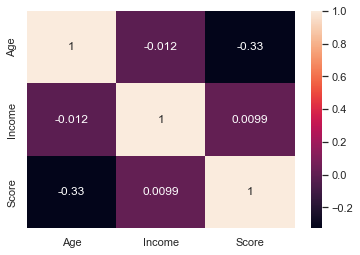

In [42]:
sns.heatmap(df.corr(), annot = True)

In [43]:
# All the feature variables are weakly related to each other

<AxesSubplot:xlabel='Age', ylabel='Score'>

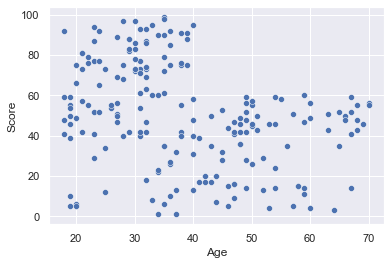

In [47]:
sns.scatterplot(x=df.Age,y=df.Score)

<AxesSubplot:xlabel='Income', ylabel='Score'>

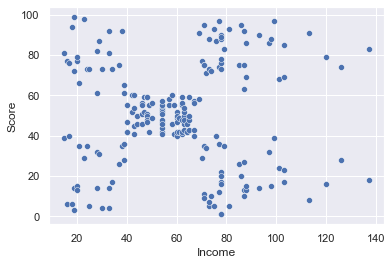

In [48]:
sns.scatterplot(x=df.Income,y=df.Score)

In [128]:
# First we will do clustering based on Age and Score
# Second we will do clustering based on Income and Score
# Third we will do clustering based on Income, Age and Score

In [50]:
# Age and Score

In [52]:
X_1 = df[['Age','Score']]

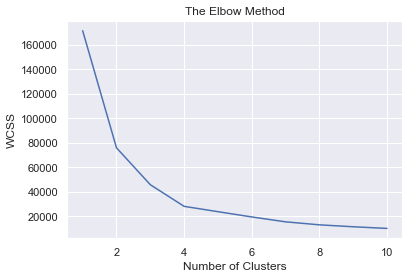

In [63]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_1)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

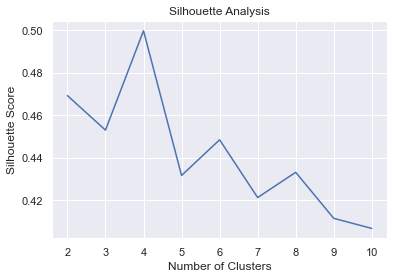

In [61]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_1)
    silhouette_scores.append(silhouette_score(X_1, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [62]:
# Judging by the Silhouette and WCSS score we can say that 4 will be the optimal number of clusters on this occasion

In [77]:
kmeans_1 = KMeans(n_clusters=4, init="k-means++")
kmeans_1.fit(X_1)

KMeans(n_clusters=4)

In [87]:
X_1['labels'] = kmeans_1.labels_
centroids_1 = kmeans_1.cluster_centers_

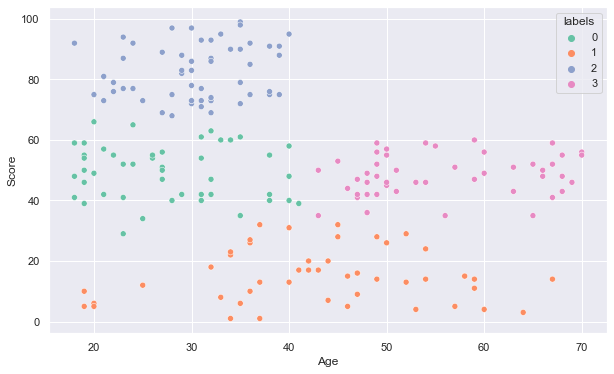

In [79]:
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=X_1.Age, y=X_1.Score, hue=X_1.labels, palette="Set2")
plt.show()

In [80]:
# Income and Score 

In [81]:
X_2 = df[['Income','Score']]

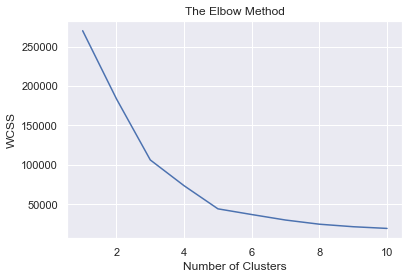

In [82]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_2)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

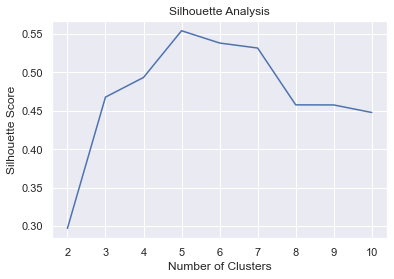

In [83]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_2)
    silhouette_scores.append(silhouette_score(X_2, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [84]:
# Judging by the Silhouette and WCSS score we can say that 5 will be the optimal number of clusters on this occasion

In [90]:
kmeans_2 = KMeans(n_clusters=5, init="k-means++")
kmeans_2.fit(X_2)

KMeans(n_clusters=5)

In [91]:
X_2['labels'] = kmeans_2.labels_
centroids_2 = kmeans_2.cluster_centers_

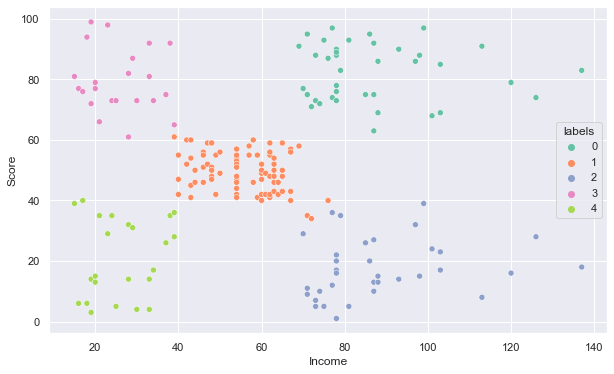

In [92]:
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=X_2.Income, y=X_2.Score, hue=X_2.labels, palette="Set2")
plt.show()

In [125]:
# Age, Income and Score

In [93]:
X_3 = df[['Age','Income','Score']]

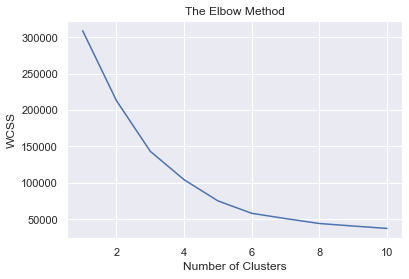

In [94]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_3)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

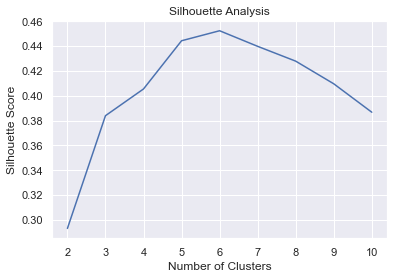

In [95]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_3)
    silhouette_scores.append(silhouette_score(X_3, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [96]:
# Judging by the Silhouette and WCSS score we can say that 6 will be the optimal number of clusters on this occasion

In [120]:
kmeans_3 = KMeans(n_clusters=6, init="k-means++")
kmeans_3.fit(X_3)

KMeans(n_clusters=6)

In [121]:
X_3['labels'] = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

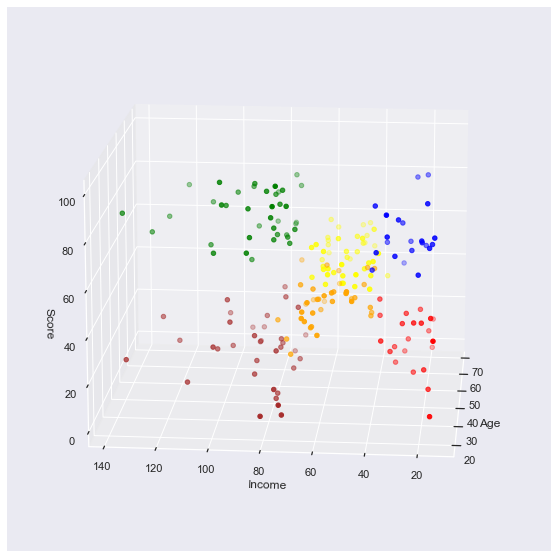

In [122]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3.Age[X_3.labels==0], X_3.Income[X_3.labels==0], X_3.Score[X_3.labels==0], c = 'blue')
ax.scatter(X_3.Age[X_3.labels==1], X_3.Income[X_3.labels==1], X_3.Score[X_3.labels==1], c = 'yellow')
ax.scatter(X_3.Age[X_3.labels==2], X_3.Income[X_3.labels==2], X_3.Score[X_3.labels==2], c = 'green')
ax.scatter(X_3.Age[X_3.labels==3], X_3.Income[X_3.labels==3], X_3.Score[X_3.labels==3], c = 'red')
ax.scatter(X_3.Age[X_3.labels==4], X_3.Income[X_3.labels==4], X_3.Score[X_3.labels==4], c = 'brown')
ax.scatter(X_3.Age[X_3.labels==5], X_3.Income[X_3.labels==5], X_3.Score[X_3.labels==5], c = 'orange')
ax.view_init(15,185)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')

plt.show()